A notebook to determine correlations on constant-slope strings

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from growthrates import *

In [59]:
def get_correlation(S):
    N = len(S)
    m = (S[-1] - S[0])/(N-1)
#     print(m)
    Cij = (S[-1] - S[-2]) * (S[1] - S[0])
    for i in range(1, N-1):
        Cij += (S[i] - S[i-1]) * (S[i+1] - S[i])
    return Cij/(N-1) - m*m

In [81]:
S = reset_S(100, -.8)
print(S)
get_correlation(S)

[  0.  -1.  -2.  -3.  -4.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12.
 -11. -12. -13. -14. -15. -16. -17. -18. -19. -20. -19. -20. -21. -22. -23.
 -24. -25. -26. -27. -28. -27. -28. -29. -30. -31. -32. -33. -34. -35. -36.
 -35. -36. -37. -38. -39. -40. -41. -42. -43. -44. -43. -44. -45. -46. -47.
 -48. -49. -50. -51. -52. -51. -52. -53. -54. -55. -56. -57. -58. -59. -60.
 -59. -60. -61. -62. -63. -64. -65. -66. -67. -68. -67. -68. -69. -70. -71.
 -72. -73. -74. -75. -76. -75. -76. -77. -78. -79.]


-0.040812162024283283

# 1-Stair

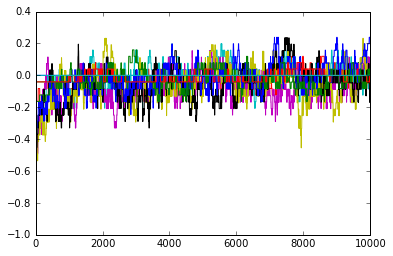

In [82]:
N = 100
Steps = 10000
slopes = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = random_update_S(S)
        correls = np.append(correls, get_correlation(S))
        
    plt.plot(ts, correls)
#     slope, intercept,_,_,_ = stats.linregress(ts[20000:],
#                                               heights[20000:])
#     plt.plot(ts, slope * ts + intercept)
#     slopes = np.append(slopes, slope)
plt.show()

# Growth Rate
# plt.plot(np.arange(-1,1.2,.2), slopes)
# plt.plot(np.arange(-1,1.2,.2), (1-np.arange(-1,1.2,.2)*np.arange(
#     -1,1.2,.2))/(2*N))
# plt.title("growth rates")
# plt.show()

# 2-Stair

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


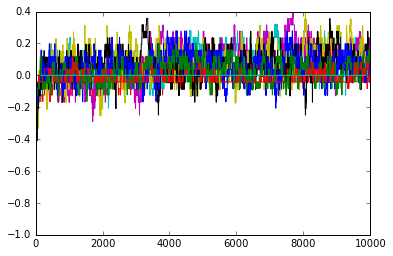

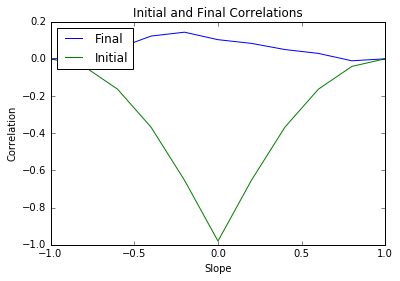

In [92]:
N = 100
Steps = 10000
n = 2
slopes = np.array([])
ts = np.arange(Steps+1)
initialCors = np.array([])
finalCors   = np.array([])

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    initialCors = np.append(initialCors, get_correlation(S))
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
        
    plt.plot(ts, correls)
    finalCors = np.append(finalCors, np.average(correls[.5*Steps:]))
#     slope, intercept,_,_,_ = stats.linregress(ts[20000:],
#                                               heights[20000:])
#     plt.plot(ts, slope * ts + intercept)
#     slopes = np.append(slopes, slope)
plt.show()

# Correlations
plt.plot(np.arange(-1,1.2,.2), finalCors, label="Final")
plt.plot(np.arange(-1,1.2,.2), initialCors, label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations")
plt.savefig("../figures/correlations/2stairCorrel.pdf")
plt.show()

# 3-Stair

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


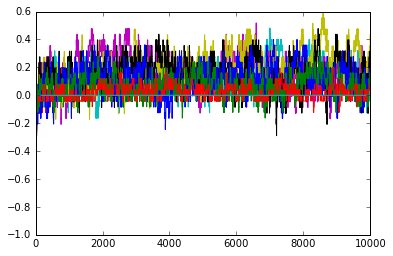

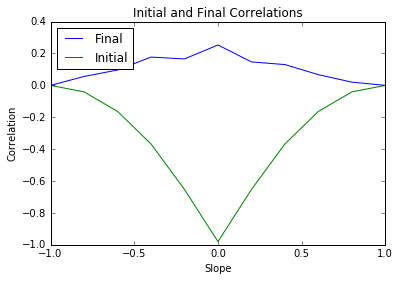

In [91]:
N = 100
Steps = 10000
n = 4
slopes = np.array([])
ts = np.arange(Steps+1)
initialCors = np.array([])
finalCors   = np.array([])

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    initialCors = np.append(initialCors, get_correlation(S))
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
        
    plt.plot(ts, correls)
    finalCors = np.append(finalCors, np.average(correls[.5*Steps:]))
#     slope, intercept,_,_,_ = stats.linregress(ts[20000:],
#                                               heights[20000:])
#     plt.plot(ts, slope * ts + intercept)
#     slopes = np.append(slopes, slope)
plt.show()

# Correlations
plt.plot(np.arange(-1,1.2,.2), finalCors, label="Final")
plt.plot(np.arange(-1,1.2,.2), initialCors, label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations")
plt.savefig("../figures/correlations/3stairCorrel.pdf")
plt.show()